In [1]:
!pip install easyocr
!pip install imutils
!pip freeze

argon2-cffi @ file:///C:/ci/argon2-cffi_1613037959010/work
async-generator @ file:///home/ktietz/src/ci/async_generator_1611927993394/work
attrs @ file:///tmp/build/80754af9/attrs_1604765588209/work
backcall @ file:///home/ktietz/src/ci/backcall_1611930011877/work
bleach @ file:///tmp/build/80754af9/bleach_1612211392645/work
certifi==2020.12.5
cffi @ file:///C:/ci/cffi_1613247279197/work
colorama @ file:///tmp/build/80754af9/colorama_1607707115595/work
cycler==0.10.0
decorator==4.4.2
defusedxml @ file:///tmp/build/80754af9/defusedxml_1615228127516/work
easyocr==1.3.0.1
entrypoints==0.3
imageio==2.9.0
importlib-metadata @ file:///C:/ci/importlib-metadata_1617877484576/work
imutils==0.5.4
ipykernel @ file:///C:/ci/ipykernel_1596190155316/work/dist/ipykernel-5.3.4-py3-none-any.whl
ipython @ file:///C:/ci/ipython_1617121002983/work
ipython-genutils @ file:///tmp/build/80754af9/ipython_genutils_1606773439826/work
jedi==0.17.0
Jinja2 @ file:///tmp/build/80754af9/jinja2_1612213139570/work
jso

In [25]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr



1-) Görüntüyü Gri Tonlama ve Bulanık Bir Şekilde Okuma

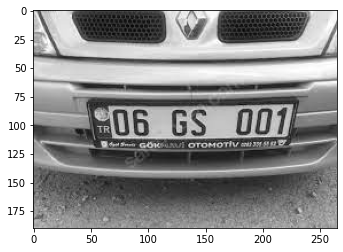

In [317]:
img = cv2.imread('image4.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

2-)Filtreleme İşlemi

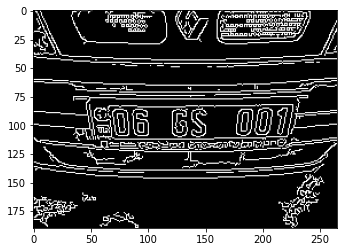

In [318]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
edged = cv2.Canny(bfilter, 30, 200) #Kenar alhılama
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

3-)Kontürleme ve Maskeleme İşlemi

In [319]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [320]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [322]:
location

In [323]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-kh7iq4w7\opencv\modules\imgproc\src\drawing.cpp:2598: error: (-215:Assertion failed) reader.ptr != NULL in function 'cvDrawContours'


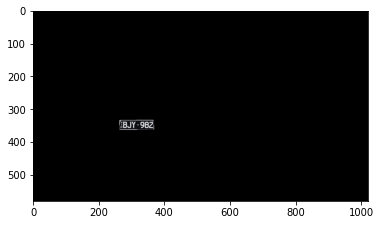

In [324]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [315]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

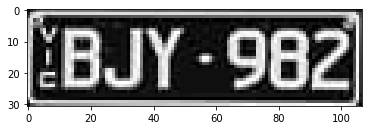

In [316]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

4-) Easy OCR Kullanarak Meti Çıkarma

In [304]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[14, 0], [220, 0], [220, 47], [14, 47]], '35 AF 8952', 0.9248374686781047)]

5-)Tespit Edilen Plakayı Yazma

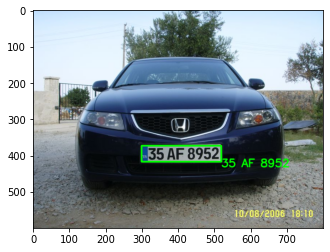

In [306]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))